# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.spatial.distance import cosine, euclidean
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:

user_ratings = ratings[ratings["userId"] == 2]
user_ratings

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


In [8]:
num_movies_watched = user_ratings.shape[0]
print(f"User 2 has watched {num_movies_watched} movies.")

User 2 has watched 29 movies.


In [9]:
watched_movies = user_ratings.merge(movies, on="movieId")["title"]
print("Movies watched by User 2:")
print(watched_movies.to_string(index=False))

Movies watched by User 2:
                  Shawshank Redemption, The (1994)
                                  Tommy Boy (1995)
                          Good Will Hunting (1997)
                                  Gladiator (2000)
                          Kill Bill: Vol. 1 (2003)
                                 Collateral (2004)
Talladega Nights: The Ballad of Ricky Bobby (2006)
                              Departed, The (2006)
                           Dark Knight, The (2008)
                              Step Brothers (2008)
                       Inglourious Basterds (2009)
                                 Zombieland (2009)
                             Shutter Island (2010)
                 Exit Through the Gift Shop (2010)
                                  Inception (2010)
                                  Town, The (2010)
                                 Inside Job (2010)
                      Louis C.K.: Hilarious (2010)
                                    Warrior (2011)
     

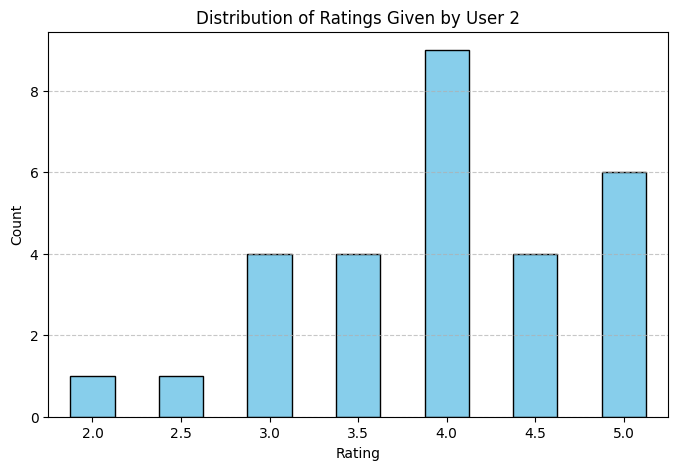

In [10]:
rating_counts = user_ratings["rating"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
rating_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings Given by User 2")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [11]:
user_movies = user_ratings.merge(movies, on="movieId")
user_movies

,userId,movieId,rating,timestamp,title,genres
0,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama
1,2,333,4.0,1445715029,Tommy Boy (1995),Comedy
2,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
3,2,3578,4.0,1445714885,Gladiator (2000),Action|Adventure|Drama
4,2,6874,4.0,1445714952,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
5,2,8798,3.5,1445714960,Collateral (2004),Action|Crime|Drama|Thriller
6,2,46970,4.0,1445715013,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy
7,2,48516,4.0,1445715064,"Departed, The (2006)",Crime|Drama|Thriller
8,2,58559,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
9,2,60756,5.0,1445714980,Step Brothers (2008),Comedy


In [13]:
top_movies = user_movies[user_movies["rating"] == 5.0][["title", "rating"]]
print("Top rated movies by User 2:")
print(top_movies)

Top rated movies by User 2:
                                                title  rating
9                                Step Brothers (2008)     5.0
16                                  Inside Job (2010)     5.0
18                                     Warrior (2011)     5.0
22                    Wolf of Wall Street, The (2013)     5.0
27                          Mad Max: Fury Road (2015)     5.0
28  The Jinx: The Life and Deaths of Robert Durst ...     5.0


In [14]:
user_item_matrix = ratings.pivot(index="userId", columns="movieId", values="rating").fillna(0)

In [16]:

vector = user_item_matrix.loc[2].values.reshape(1, -1)

In [18]:
cosine_similarities = cosine_similarity(vector, user_item_matrix)[0]

In [19]:
euclidean_distances = user_item_matrix.apply(lambda row: euclidean(vector.flatten(), row.values), axis=1)

In [20]:
most_similar_user_cosine = user_item_matrix.index[cosine_similarities.argsort()[-2]]

In [21]:
most_similar_user_euclidean = euclidean_distances.drop(2).idxmin()

In [23]:
print(f"Most similar user with user Id 2 (Cosine Similarity): {most_similar_user_cosine}")
print(f"Most similar user with user ID 2 (Euclidean Distance): {most_similar_user_euclidean}")

Most similar user with user Id 2 (Cosine Similarity): 366
Most similar user with user ID 2 (Euclidean Distance): 442


In [24]:

similar_user_ratings = ratings[ratings["userId"] == most_similar_user_cosine]
recommended_movies = similar_user_ratings.merge(movies, on="movieId").sort_values(by="rating", ascending=False)
print("Recommended movies based on similar user:")
print(recommended_movies[["title", "rating"]].head(5))

Recommended movies based on similar user:
                                              title  rating
3                             Reservoir Dogs (1992)     5.0
27                              Interstellar (2014)     5.0
16  Harry Potter and the Prisoner of Azkaban (2004)     4.5
29                        The Imitation Game (2014)     4.5
5                                 Fight Club (1999)     4.5


# Analysis

Yes, the recommendations from this method make sense.Since User 2 mostly gave ratings of 4, it shows they generally like well-rated or popular movies but are not overly generous with perfect scores. When cosine similarity was used to find similar users, the method focused on how closely their rating patterns matched in direction rather than absolute values. This allowed the model to identify another user (User 366) who tends to rate movies in a similar way — liking and disliking the same types of films — even if the exact rating numbers differ slightly. As a result, the movies recommended to User 2 were consistent with their viewing history and taste profile. The recommended films were similar in genre and rating quality to those User 2 had already rated highly. Overall, the cosine similarity method provided logical and realistic suggestions, making it a better choice for capturing true preference alignment compared to Euclidean distance.

# Summary

The dataset containing ratings and movie information was first imported, and the data was filtered specifically for User 2. Through this process, it was found that User 2 had watched a total of 29 movies. To better understand the user’s rating behavior, a bar chart was plotted using the sort_index() function, which clearly showed that User 2 primarily gave ratings of 4, indicating a generally positive but slightly selective taste in movies. Afterward, the ratings data was merged with the movies dataset to include movie titles, which helped identify some of User 2’s favorite films based on their highest ratings.

Next, similarity metrics were used to identify users with viewing and rating patterns closest to those of User 2. Two distance measures — cosine similarity and Euclidean distance — were applied to the user-item matrix. From the analysis, User 366 was found to be the most similar to User 2 based on cosine similarity, while User 442 appeared closest using Euclidean distance. However, cosine similarity produced more meaningful results since it focuses on the angle of ratings rather than their magnitude, making it better at detecting users with similar preferences even if their rating scales differ.

Finally, movie recommendations were generated for User 2 based on the preferences of the most similar user (User 366) using cosine similarity. The recommendations were reasonable, as they included movies consistent with User 2’s pattern of moderately high ratings. Overall, cosine similarity was chosen as the preferred metric because it provided a more accurate reflection of user preference alignment and produced logically consistent recommendations.